In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore")
from scipy.optimize import minimize
# from sklearn.utils import resample
plt.rcParams['figure.figsize'] = (20, 10)

In [46]:
df = pd.read_csv('merged.csv', index_col='Date')
len(df)

878

In [47]:
df['Typical_Price'] = df[['High','Low','Close']].mean(axis=1)
df.head()

,Unnamed: 0,Open,Close,High,Low,Volume,Typical_Price,Mkt-RF,SMB,HML,RF,ADS_Index_102419
Date,,,,,,,,,,,,
2016-01-04,0,656.289978,636.989990,657.719971,627.510010,9314500,640.739990,-1.59,-0.83,0.53,0.0,-0.323161
2016-01-05,1,646.859985,633.789978,646.909973,627.650024,5822600,636.116658,0.12,-0.22,0.01,0.0,-0.308306
2016-01-06,2,622.000000,632.650024,639.789978,620.309998,5329200,630.916667,-1.35,-0.12,-0.01,0.0,-0.294275
2016-01-07,3,621.799988,607.940002,630.000000,605.210022,7074900,614.383341,-2.44,-0.29,0.08,0.0,-0.281066
2016-01-08,4,619.659973,607.049988,624.140015,606.000000,5512900,612.396668,-1.11,-0.47,-0.03,0.0,-0.268678


In [48]:
df['Typical_Price_returns'] = (np.log(df.Typical_Price) - np.log(df.Typical_Price.shift(1))) * 100.
df['Volume_returns'] = (np.log(df.Volume) - np.log(df.Volume.shift(1))) * 100.
df.head()

,Unnamed: 0,Open,Close,High,Low,Volume,Typical_Price,Mkt-RF,SMB,HML,RF,ADS_Index_102419,Typical_Price_returns,Volume_returns
Date,,,,,,,,,,,,,,
2016-01-04,0,656.289978,636.989990,657.719971,627.510010,9314500,640.739990,-1.59,-0.83,0.53,0.0,-0.323161,NaN,NaN
2016-01-05,1,646.859985,633.789978,646.909973,627.650024,5822600,636.116658,0.12,-0.22,0.01,0.0,-0.308306,-0.724177,-46.982543
2016-01-06,2,622.000000,632.650024,639.789978,620.309998,5329200,630.916667,-1.35,-0.12,-0.01,0.0,-0.294275,-0.820818,-8.854576
2016-01-07,3,621.799988,607.940002,630.000000,605.210022,7074900,614.383341,-2.44,-0.29,0.08,0.0,-0.281066,-2.655472,28.335218
2016-01-08,4,619.659973,607.049988,624.140015,606.000000,5512900,612.396668,-1.11,-0.47,-0.03,0.0,-0.268678,-0.323885,-24.946251


1: AutoRegressiveModel


In [0]:
class ar1:
    
    def fit(X,Y):
        
        invXX = np.linalg.inv(X.transpose()@X)
        beta_hat = invXX@X.transpose()@Y
        y_hat = X@beta_hat
        residuals = Y - y_hat
        T = Y.shape[0]
        N = X.shape
        
        sigma2 = (1/T)*residuals.transpose()@residuals
        sigma = np.sqrt(sigma2)
        varcov_beta_hat = (sigma2)*invXX
        std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))
        R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
        adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
        t_stat = (beta_hat.transpose()-0)/std_beta_hat
        p_val = 1-ss.norm.cdf(t_stat)
        F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/(residuals.transpose()@residuals/(T-N[1]))
        p_val_F = 1 - ss.f.cdf(F_stat,N[1]-1,T-N[1])
#         rmse = np.sqrt(np.mean((Y-y_hat)**2))
#         ar1.metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse)
        return beta_hat,y_hat
    
    def metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse):
        
        t = PrettyTable(['Metrics', 'Values'])
        t.add_row(['Beta Values', beta_hat])
        t.add_row(['RMSE',rmse])
        t.add_row(['R-Square',R_square])
        t.add_row(['Adjusted R-Square',adj_R_square])
        t.add_row(['P values',p_val])
        print(t)
        plt.plot(Y)
        plt.plot(y_hat)



In [0]:
    X_ar = df[['Typical_Price','Volume']].as_matrix()[1:]
    X_ar = np.column_stack([np.ones((len(X_ar),1)),X_ar])
    Y_ar = df[['Open']].as_matrix()[:-1]

    y_hat_1 = ar1.fit(X_ar,Y_ar)

2:Farma French

In [0]:
class Fama_French_5F:
    
    def fit(X,Y):
        
        invXX = np.linalg.inv(X.transpose()@X)
        beta_hat = invXX@X.transpose()@Y
        y_hat = X@beta_hat
        residuals = Y - y_hat
        T = Y.shape[0]
        N = X.shape
        
        sigma2 = (1/T)*residuals.transpose()@residuals
        sigma = np.sqrt(sigma2)
        varcov_beta_hat = (sigma2)*invXX
        std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))
        R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
        adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
        t_stat = (beta_hat.transpose()-0)/std_beta_hat
        p_val = 1-ss.norm.cdf(t_stat)
        F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/(residuals.transpose()@residuals/(T-N[1]))
        p_val_F = 1 - ss.f.cdf(F_stat,N[1]-1,T-N[1])
#         rmse = np.sqrt(np.mean((Y-y_hat)**2))
#         ar1.metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse)
        return beta_hat,y_hat
    
    def metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse):
        
        t = PrettyTable(['Metrics', 'Values'])
        t.add_row(['Beta Values', beta_hat])
        t.add_row(['RMSE',rmse])
        t.add_row(['R-Square',R_square])
        t.add_row(['Adjusted R-Square',adj_R_square])
        t.add_row(['P values',p_val])
        print(t)
        plt.plot(Y)
        plt.plot(y_hat)

In [0]:
X_FF = df[['Mkt-RF','SMB','HML','ADS_Index_102419']].as_matrix()[1:]
X_FF = np.column_stack([np.ones((len(X_FF),1)),X_FF])
Y_FF = df[['Open']].as_matrix()[:-1]

y_hat_2 = Fama_French_5F.fit(X_FF,Y_FF)

3 : Moving Average

In [0]:
class moving_average:
    
    def fit(X,Y):
        
        invXX = np.linalg.inv(X.transpose()@X)
        beta_hat = invXX@X.transpose()@Y
        y_hat = X@beta_hat
        residuals = Y - y_hat
        T = Y.shape[0]
        N = X.shape
        
        sigma2 = (1/T)*residuals.transpose()@residuals
        sigma = np.sqrt(sigma2)
        varcov_beta_hat = (sigma2)*invXX
        std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))
        R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
        adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
        t_stat = (beta_hat.transpose()-0)/std_beta_hat
        p_val = 1-ss.norm.cdf(t_stat)
        F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/(residuals.transpose()@residuals/(T-N[1]))
        p_val_F = 1 - ss.f.cdf(F_stat,N[1]-1,T-N[1])
#         rmse = np.sqrt(np.mean((Y-y_hat)**2))
#         ar1.metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse)
        return beta_hat,y_hat
    
    def metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse):
        
        t = PrettyTable(['Metrics', 'Values'])
        t.add_row(['Beta Values', beta_hat])
        t.add_row(['RMSE',rmse])
        t.add_row(['R-Square',R_square])
        t.add_row(['Adjusted R-Square',adj_R_square])
        t.add_row(['P values',p_val])
        print(t)
        plt.plot(Y)
        plt.plot(y_hat)






In [0]:

X_EMA = df[['Typical_Price_returns','Volume_returns']].as_matrix()[1:]
X_EMA = np.column_stack([np.ones((len(X_EMA),1)),X_EMA])
Y_EMA = df[['Open']].as_matrix()[:-1]

y_hat_3 = moving_average.fit(X_EMA,Y_EMA)

In [0]:
def Randomforest():
    
    #AR1
    N = df.shape[0] # Total Number of days
    num_boot = 400 #  Number of bootstraps
    T= 250 #Starting Value
    window = 200
    
    Y =df['Open'][-(N-(T+1)):].values
    Y_close = df['Close'][-(N-(T+1)):].values
    
    y_hat_ar = np.zeros(N-(T+1))
    
    for t in range(T+1, N):    
        # training data
        X_train = df[['Typical_Price','Volume']][t-window:t-1] # regression variables
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])
        Y_train = df['Open'][t-window:t-1].values
        # one day prediction
        X_pred = df[['Typical_Price','Volume']][t-1:t]
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])
        
        yhat_train = ar1.fit(X_train, Y_train)[1]
        
        res_train =  Y_train - yhat_train
        y_pred_all = np.zeros(num_boot)
        # bootstrap method: switching residuals
        for i in range(0, num_boot):
            err = np.random.choice(res_train, (window-1, ), replace=True)
            y_bstr = yhat_train + err   
            beta_bstr = ar1.fit(X_train, y_bstr)[0]
            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[i]=y_pred_bstr         
        y_pred_ar1 = y_pred_all.mean() # get mean of all bootstrap predictions        
        y_hat_ar[t-(T+1)]=y_pred_ar1 # do this for each time step
    rmse_ar1 = np.sqrt(np.mean((y_hat_ar-Y)**2))
    print(rmse_ar1)
    
    #FF
    
    y_hat_FF = np.zeros(N-(T+1))
    
    for t in range(T+1, N):    
        # training data
        X_train = df[['Mkt-RF','SMB','HML','ADS_Index_102419']][t-window:t-1] # regression variables
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])
        Y_train = df['Open'][t-window:t-1].values
        # one day prediction
        X_pred = df[['Mkt-RF','SMB','HML','ADS_Index_102419']][t-1:t]
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])
        
        yhat_train = Fama_French_5F.fit(X_train, Y_train)[1]
        
        res_train =  Y_train - yhat_train
        y_pred_all = np.zeros(num_boot)
        # bootstrap method: switching residuals
        for i in range(0, num_boot):
            err = np.random.choice(res_train, (window-1, ), replace=True)
            y_bstr = yhat_train + err   
            beta_bstr = Fama_French_5F.fit(X_train, y_bstr)[0]
            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[i]=y_pred_bstr         
        y_pred_FF = y_pred_all.mean() # get mean of all bootstrap predictions        
        y_hat_FF[t-(T+1)]=y_pred_FF # do this for each time step
    rmse_FF = np.sqrt(np.mean((y_hat_FF-Y)**2))
    print(rmse_FF)
    
    #MA
    
    y_hat_ma = np.zeros(N-(T+1))
    #df['ema'] = df.Typical_Price.ewm(span=5,adjust=False).mean()
    for t in range(T+1, N):    
        # training data
        X_train = df[['Typical_Price_returns','Volume_returns']][t-window:t-1] # regression variables
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])
        Y_train = df['Open'][t-window:t-1].values
        # one day prediction
        X_pred = df[['Typical_Price_returns','Volume_returns']][t-1:t]
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])
        
        yhat_train = moving_average.fit(X_train, Y_train)[1]
        
        res_train =  Y_train - yhat_train
        y_pred_all = np.zeros(num_boot)
        # bootstrap method: switching residuals
        for i in range(0, num_boot):
            err = np.random.choice(res_train, (window-1, ), replace=True)
            y_bstr = yhat_train + err   
            beta_bstr = moving_average.fit(X_train, y_bstr)[0]
            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[i]=y_pred_bstr         
        y_pred_ma = y_pred_all.mean() # get mean of all bootstrap predictions        
        y_hat_ma[t-(T+1)]=y_pred_ma # do this for each time step
    rmse_ma = np.sqrt(np.mean((y_hat_ma-Y)**2))
    print(rmse_ma)

    T1 = Y.shape[0]
    Y_rf = np.zeros(T1)
    for t in range(0, T1):
        if min(abs(y_hat_ar[t]-Y[t]),abs(y_hat_ma[t]-Y[t]),
               abs(y_hat_FF[t]-Y[t]))==abs(y_hat_ar[t]-Y[t]):
            Y_rf[t] = y_hat_ar[t]
        elif min(abs(y_hat_ar[t]-Y[t]),abs(y_hat_ma[t]-Y[t]),
                 abs(y_hat_FF[t]-Y[t]))==abs(y_hat_ma[t]-Y[t]):
            Y_rf[t] = y_hat_ma[t]
        elif min(abs(y_hat_ar[t]-Y[t]),abs(y_hat_ma[t]-Y[t]),
                 abs(y_hat_FF[t]-Y[t]))==abs(y_hat_FF[t]-Y[t]):
            Y_rf[t] = y_hat_FF[t]          
        else:
            Y_rf[t] = y_hat_allf[t]  
    rmse_rf=np.sqrt(np.mean((Y-Y_rf)**2))
    
    print("ar1_RMSE: ", rmse_ar1)
    print("ma_RMSE: ", rmse_ma)
    print("FF_RMSE: ", rmse_FF)
    print("random forest rmse: ", rmse_rf)
    
    timevec = np.linspace(1,T1,T1)
    plt.figure(figsize=(30,20))
    
    ax = plt.subplot(211)
    ax.plot(timevec, Y, 'blue', label = "Y: original")
    ax.plot(timevec, y_hat_ar, 'red', label = "AR1")
    ax.plot(timevec, y_hat_ma, 'green', label = "Moving Average")
    ax.plot(timevec, y_hat_FF, 'purple', label = "Farma French")
    plt.title('Models Prediction using single models')
    ax.legend(loc=2, bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
    
    
    ax = plt.subplot(212)
    ax.plot(timevec, Y, 'blue', label = "Y: original")
    ax.plot(timevec, Y_rf, 'red', label = "Y_rf")
    plt.title('Random Forest Prediction')
    ax.legend(loc=2, bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
    plt.show()
    
    return Y_rf,Y, Y_close
    

19.575848642940926
244.07716545004462
232.98922197562845
ar1_RMSE:  19.575848642940926
ma_RMSE:  232.98922197562845
FF_RMSE:  244.07716545004462
random forest rmse:  17.924176520299813


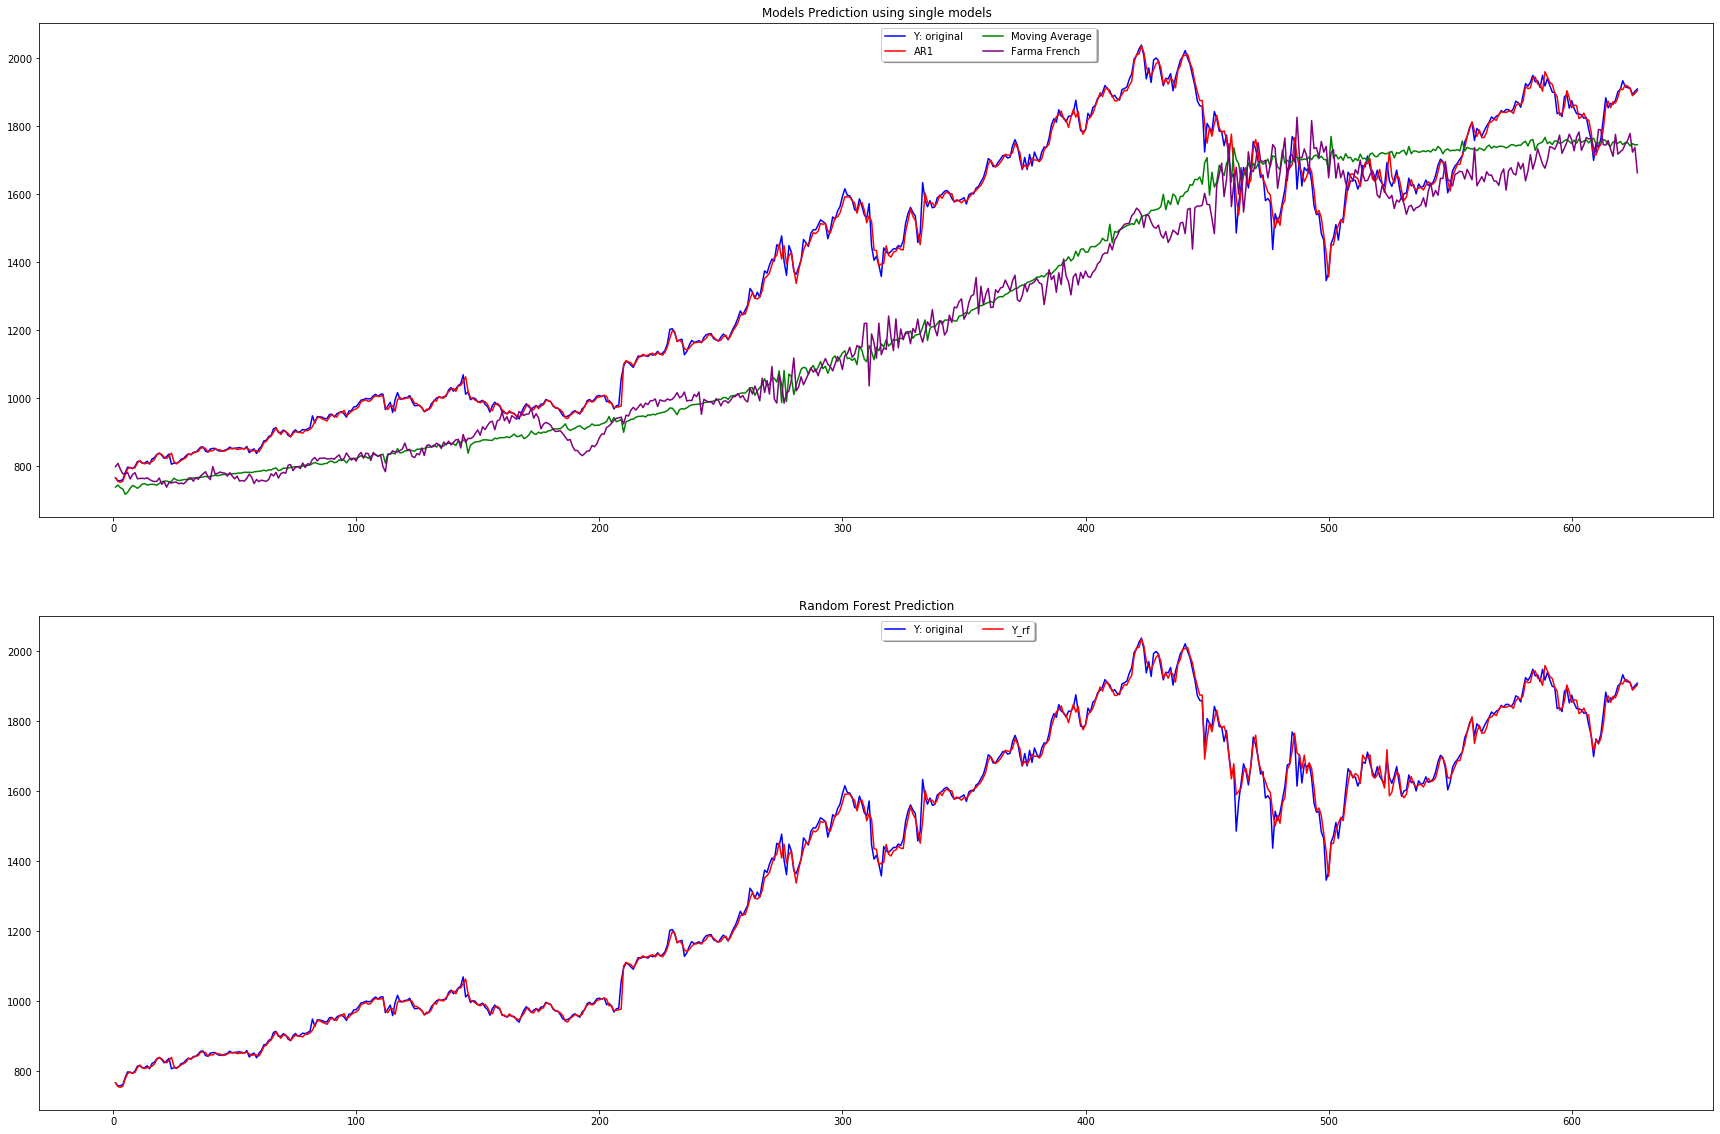

In [58]:
Y_rf,Y, Y_close = Randomforest()

In [0]:
results = np.stack([Y,Y_rf,Y_close],axis=1)

In [39]:
final_results = pd.DataFrame(results,columns=['Y','Y_rf','Y_close'])
final_results.tail()

,Y,Y_rf,Y_close
622,1912.660034,1917.199598,1913.900024
623,1911.839966,1910.345486,1878.270020
624,1892.479980,1889.122569,1897.829956
625,1902.000000,1896.346567,1904.280029
626,1909.099976,1904.144235,1893.630005


In [0]:
final_results = final_results.reindex()